In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import os
import time
import matplotlib as mpl      
import math
import scipy as sc
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv("table4.csv") #טעינת טבלת האקסל שבה שמרנו לאחר הקרולינג
dataset = df.copy()
dataset2 = df.copy()

In [53]:
dataset

,Unnamed: 0,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Address,Year Built Details,Roof,Property Sub Type,Attached Garage,...,Possible Bedrooms,Fireplace,Cooling,Association Fee,Flooring,Window Features,Parking Features,Patio And Porch Features,Heating,Fencing
0,2.0,"$349,000",2,2,1219,3901 Aspencrest Dr,RESALE,Tile,Single Family Residence,Yes,...,2.0,"eatures: Family Room, Gas","Central Air, Electric",23,"Carpet, Laminate, Tile",Blinds,"Attached, Garage, Garage Door Opener, Inside E...","Covered, Patio","Central, Gas","Block, Back Yard"
1,3.0,"$389,000",3,2,1365,3107 Single Leaf Cir,RESALE,"Composition, Shingle",Single Family Residence,Yes,...,3.0,NaN,"Central Air, Gas",NaN,"Laminate, Tile",Double Pane Windows,"Attached, Garage",NaN,"Central, Gas","Block, Back Yard"
2,4.0,"$290,000",3,2,1079,1304 Purple Sage Ave,RESALE,"Composition, Shingle",Single Family Residence,NaN,...,3.0,NaN,"Central Air, Electric",NaN,Laminate,Drapes,Attached Carport,NaN,"Central, Gas","Back Yard, Wood"
3,5.0,"$320,000",3,2,None,705 van Ert Ave,RESALE,"Composition, Shingle",Single Family Residence,NaN,...,3.0,NaN,"Central Air, Electric",NaN,Hardwood,NaN,Attached Carport,NaN,"Central, Electric","Back Yard, Chain Link, Metal"
4,6.0,"$1,200,000",6,6,5061,4815 N Riley St,RESALE,Tile,Single Family Residence,Yes,...,8.0,"eatures: Bedroom, Gas, Glass Doors, Great Room","Central Air, Electric, 2 Units",NaN,"Carpet, Laminate, Marble, Tile","Double Pane Windows, Plantation Shutters, Skyl...","Attached, Finished Garage, Garage, Garage Door...",Balcony,"Central, Gas, Multiple Heating Units","Block, Back Yard, RV Gate"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,NaN,"$455,000",3,2,1739,10810 Morning Frost St,RESALE,"Pitched, Tile",Single Family Residence,Yes,...,3.0,NaN,"Central Air, Electric",Frequency: Monthly,"Ceramic Tile, Hardwood","Double Pane Windows, Plantation Shutters","Attached, Finished Garage, Garage, Garage Door...","Covered, Patio, Porch","Central, Gas","Block, Back Yard"
2789,NaN,"$555,000",4,3,2628,5690 Topaz St,RESALE,Tile,Single Family Residence,NaN,...,4.0,"eatures: Living Room, Wood Burning","Central Air, Electric",NaN,"Carpet, Laminate",NaN,NaN,NaN,"Central, Electric","Block, Back Yard"
2790,NaN,"$690,000",2,2,1665,6800 Steel Mist St,NEW,"Pitched, Tile",Single Family Residence,Yes,...,3.0,NaN,"Central Air, Electric",Frequency: Monthly,"Carpet, Tile","Double Pane Windows, Low Emissivity Windows","Attached, Finished Garage, Garage, Garage Door...","Covered, Patio","Central, Gas","Block, Back Yard"
2791,NaN,"$307,000",2,2,None,7728 Barbican Ct,RESALE,Tile,Single Family Residence,Yes,...,2.0,"eatures: Gas, Living Room","Central Air, Electric",16,Tile,Blinds,"Attached, Garage",NaN,"Central, Gas",Back Yard


In [4]:
dataset.describe(include = 'all') #הודפס על מנת להבין איך לטפל בנתונים

,Unnamed: 0,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Address,Year Built Details,Roof,Property Sub Type,Attached Garage,...,Possible Bedrooms,Fireplace,Cooling,Association Fee,Flooring,Window Features,Parking Features,Patio And Porch Features,Heating,Fencing
count,672.000000,2793,2793,2793,2793,2793,2770,2256,2256,1856,...,2688.000000,1388,2770,2309,2514,2356,2603,2046,2770,2248
unique,NaN,1058,10,10,1424,2360,6,38,7,2,...,NaN,204,41,448,129,187,696,36,73,116
top,NaN,"$750,000",4,3,None,2590 E Viking Rd,RESALE,Tile,Single Family Residence,Yes,...,NaN,"eatures: Family Room, Gas","Central Air, Electric",Frequency: Monthly,"Carpet, Tile",Blinds,"Attached, Garage","Covered, Patio","Central, Gas","Block, Back Yard"
freq,NaN,30,768,1035,342,6,2643,1559,1922,1795,...,NaN,282,1334,767,461,360,371,685,1287,1188
mean,338.491071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.026786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,194.149335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.764732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,170.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,338.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,506.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2_clean = dataset.dropna(axis = 1, thresh = 1500) #מוחק את כל העמודות שיש להן פחות מ1500 ערכים
df_clean = df2_clean.dropna(axis = 0, thresh = 10) #מוחק את השורות שיש להן פחות מ10 ערכים

In [6]:
df2_clean = df_clean[df2_clean['Sq_Ft_Count'] != 'None'] #מוחק את כל השורות שאין להן מטר מרובע לבית(ערך מאוד חשוב לחיזוי)
df_clean = df2_clean

C:\Users\vladi\AppData\Local\Temp\ipykernel_3424\3147399551.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_clean = df_clean[df2_clean['Sq_Ft_Count'] != 'None'] #מוחק את כל השורות שאין להן מטר מרובע לבית(ערך מאוד חשוב לחיזוי)


In [7]:
df_clean.duplicated().sum() #כמות השורות הכפולות

291

In [8]:
df_clean.drop_duplicates(keep = 'first', inplace = True) #מחיקת השורות הכפולות
df_clean.shape

(2160, 20)

In [9]:
df_clean['Price'] = df_clean['Price'].str.replace('[^\d.]', '', regex=True).astype(int) #הורדנו $ ופסיקים במחיר
df_clean['Attached Garage'] = df_clean['Attached Garage'].fillna(0)
df_clean['Property Sub Type'] = df_clean['Property Sub Type'].fillna(df_clean['Property Sub Type'].mode()[0]) #הכנסנו את הערך הכי שכיח במקום הריק
df_clean['Property Sub Type'].isnull().sum()
df_clean['Sewer'] = df_clean['Sewer'].fillna(df_clean['Sewer'].mode()[0]) #הכנסנו את הערך הכי שכיח במקום הריק
df_clean['Sewer'].isnull().sum()
df_clean['Possible Bedrooms'] = df_clean['Possible Bedrooms'].fillna(df_clean['Possible Bedrooms'].mode()[0]) #הכנסנו את הערך הכי שכיח במקום הריק
df_clean['Possible Bedrooms'].isnull().sum()
value_map7 = {' Frequency: Monthly': 0, 'ncludes: None': 0,' Frequency: Quarterly': 0 ,' Frequency: Annually': 0,'ncludes: Association Management': 0,'ncludes: Water': 0}
df_clean['Association Fee'] = df_clean['Association Fee'].replace(value_map7) #הכנסו 0 בכל מקום שלא ציינו את ערך המס הנתון


In [10]:
value_map = {'Yes': 1, 'No': 0}
df_clean['Attached Garage'] = df_clean['Attached Garage'].replace(value_map) #אם יש חניה=1 אם אין חניה=0
value_map1 = {'Public Sewer': 1, 'Septic Tank': 1,'Public Sewer, Septic Tank' : 2}#אם יש ביוב אחד או שלא היה מוזן=1 אם יש שני סוגי ביוב=2
df_clean['Sewer'] = df_clean['Sewer'].replace(value_map1)
value_map2 = {'RESALE': 1, 'NEW': 3, 'UNDER CONSTRUCTION' : 2, 'TO BE BUILT' : 2, 'DECORATOR READY' : 2, 'PARTIALLY COMPLETE': 2}
df_clean['Year Built Details'] = df_clean['Year Built Details'].replace(value_map2)#אם מבנה חדש=3 אם בבנייה חדשה=2 אם מבנה ישן=1
value_map3 = {'None': 4}
df_clean['Beds_Count'] = df_clean['Beds_Count'].replace(value_map3)#איפה שהיה חוסר מלאנו בהכי שכיח לפני Describe
value_map4 = {'None': 3}
df_clean['Baths_Count'] = df_clean['Baths_Count'].replace(value_map4)#איפה שהיה חוסר מלאנו בהכי שכיח לפני Describe
value_map6 = {'Single Family Residence': 2, 'Condominium': 1, 'Multi Family': 4, 'Townhouse': 1, 'Duplex': 3, 'Manufactured Home': 2, 'Triplex': 4}
df_clean['Property Sub Type'] = df_clean['Property Sub Type'].replace(value_map6) #אם זה בית משותף או בית עירוני=1 , אם זה מגורים ליחיד או בית מנוייד 2 , אם זה דופלקס=3 , אם זה טריפלקס או למשפחה מורחבת=4
df_clean['Possible Bedrooms'] = df_clean['Possible Bedrooms'].astype(int) #Double to int
value_map8 = {'Covered, Patio': 1, np.nan: 0, 'Balcony': 1,'Balcony, Covered, Deck, Patio': 1,'Covered, Patio, Porch': 1,'Patio': 1,'Balcony, Covered, Patio': 1,'Patio, Porch': 1,'Terrace': 1,'Deck': 1,'Covered, Enclosed, Patio, Porch': 1,'Balcony, Covered, Patio, Porch': 1,'Balcony, Porch': 1,'Balcony, Deck, Porch': 1,'Balcony, Patio': 1,'Covered, Enclosed, Patio': 1,'Porch': 1,'Covered, Deck, Patio': 1,'Deck, Patio': 1,'Balcony, Deck': 1,'Balcony, Covered, Enclosed, Patio': 1,'Enclosed, Patio': 1,'Deck, Rooftop': 1,'Covered, Deck, Enclosed, Patio': 1,'Balcony, Covered, Deck, Patio, Porch': 1,'Balcony, Covered, Deck, Enclosed, Patio': 1,'Covered, Deck, Patio, Rooftop': 1,'Balcony, Deck, Rooftop': 1,'Covered, Deck, Patio, Porch, Rooftop': 1,'Enclosed, Patio, Porch': 1,'Balcony, Covered, Enclosed, Patio, Porch': 1,'Balcony, Covered, Deck, Patio, Rooftop': 1,'Deck, Patio, Porch, Rooftop': 1,'Balcony, Deck, Patio': 1,'Balcony, Patio, Porch': 1,'Deck, Patio, Porch': 1,'Covered, Deck, Patio, Porch': 1}
df_clean['Patio And Porch Features'] = df_clean['Patio And Porch Features'].replace(value_map8) #אם יש מרפסת =1 אם אין מרפסת =0

In [11]:
unique_values = df_clean['Sewer'].unique() #פונקציה שבעזרת הבנו איזה ערכים יש לנו בכל עמודה ולמה להחליף
for value in unique_values:
    print(value)

1
2


In [12]:
df_clean['Association Fee'] = df_clean['Association Fee'].fillna(df_clean['Association Fee'].mode()[0]) #הכנסנו את הערך הכי שכיח במקום הריק
df_clean['Association Fee'].isnull().sum() 

0

In [13]:
columns_to_remove = ['Address', 'Roof','Attribution Contact','Cooling','Flooring','Window Features','Parking Features','Heating','Fencing']
df_clean = df_clean.drop(columns=columns_to_remove) #מחיקת העמודות שלא יעזרו לנו לאנליזה

In [14]:
df_clean['Beds_Count'] = df_clean['Beds_Count'].astype(int)
df_clean['Baths_Count'] = df_clean['Baths_Count'].astype(int)
df_clean['Association Fee'] = df_clean['Association Fee'].astype(int)
df_clean['Sq_Ft_Count'] = df_clean['Sq_Ft_Count'].astype(int) #הפיכת כל השורות ל(INT)

In [15]:
df_clean.info()  #בדיקה שכל העמודות הפכו לאינט

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2792
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Price                     2160 non-null   int32
 1   Beds_Count                2160 non-null   int32
 2   Baths_Count               2160 non-null   int32
 3   Sq_Ft_Count               2160 non-null   int32
 4   Year Built Details        2160 non-null   int64
 5   Property Sub Type         2160 non-null   int64
 6   Attached Garage           2160 non-null   int64
 7   Sewer                     2160 non-null   int64
 8   Possible Bedrooms         2160 non-null   int32
 9   Association Fee           2160 non-null   int32
 10  Patio And Porch Features  2160 non-null   int64
dtypes: int32(6), int64(5)
memory usage: 151.9 KB


In [16]:
df_clean  #הדאטה לאחר ניקוי

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,349000,2,2,1219,1,2,1,1,2,23,1
1,389000,3,2,1365,1,2,1,1,3,0,0
2,290000,3,2,1079,1,2,0,1,3,0,0
4,1200000,6,6,5061,1,2,1,1,8,0,1
5,499000,4,3,2801,1,2,1,1,6,25,0
...,...,...,...,...,...,...,...,...,...,...,...
2787,800000,4,3,2976,1,2,1,1,4,194,1
2788,455000,3,2,1739,1,2,1,1,3,0,1
2789,555000,4,3,2628,1,2,0,1,4,0,0
2790,690000,2,2,1665,3,2,1,1,3,0,1


In [17]:
sorted_df = df_clean.sort_values(by='Price', ascending=True) #הצגת המחירים מהכי קטן להכי גדול (על מנת לראות דברים חריגים)
display(sorted_df)

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
2657,145000,2,2,1196,1,2,0,1,2,0,1
2712,155000,2,2,1584,1,2,0,1,2,72,1
2364,165000,2,2,1020,1,1,0,1,2,245,1
2671,167000,2,2,1060,1,1,1,1,2,240,0
1468,169000,2,2,1178,1,2,0,1,2,440,0
...,...,...,...,...,...,...,...,...,...,...,...
965,7999999,4,5,5412,1,2,1,1,5,0,1
1321,8500000,3,4,3980,1,2,0,1,3,4326,0
911,8500000,4,6,8323,1,2,1,1,7,0,1
1805,13995000,2,5,8017,1,2,0,1,4,4579,1


In [18]:
Q1 = np.percentile(df_clean["Price"], 25) #מציאת ערכים שהם חריגים ביחס של קטן מהאחוזון ה25 וגדול מהאחוזון ה75
Q3 = np.percentile(df_clean["Price"], 75)
IQR = Q3 - Q1

Fare_outliers_rows = df_clean[(df_clean["Price"] < Q1 - 1.5*IQR) | (df_clean["Price"] > Q3 + 1.5*IQR)].index

print(len(Fare_outliers_rows)) #הדפסת כמות הערכים החריגים

191


In [19]:
df_clean = df_clean.drop(Fare_outliers_rows) #מחיקת הערכים החריגים
df_clean

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,349000,2,2,1219,1,2,1,1,2,23,1
1,389000,3,2,1365,1,2,1,1,3,0,0
2,290000,3,2,1079,1,2,0,1,3,0,0
4,1200000,6,6,5061,1,2,1,1,8,0,1
5,499000,4,3,2801,1,2,1,1,6,25,0
...,...,...,...,...,...,...,...,...,...,...,...
2787,800000,4,3,2976,1,2,1,1,4,194,1
2788,455000,3,2,1739,1,2,1,1,3,0,1
2789,555000,4,3,2628,1,2,0,1,4,0,0
2790,690000,2,2,1665,3,2,1,1,3,0,1


In [20]:
middle_price = int(df_clean["Price"].median())  #בדיקה מה הממוצע של הערכים מחיר ומטר מרובע לבית
middle_sqm =  int(df_clean["Sq_Ft_Count"].median())
print(middle_price, middle_sqm)

550000 2139


C:\Users\vladi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.17187094470537942

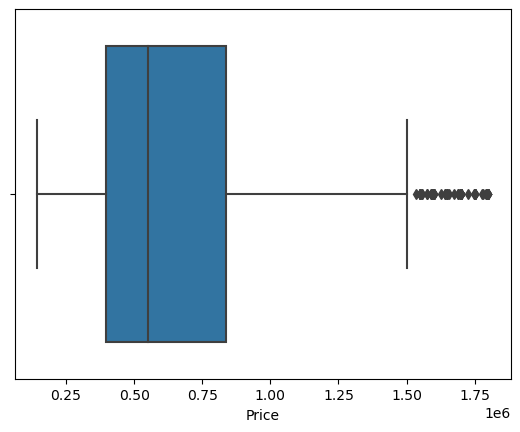

In [21]:
sns.boxplot(df_clean['Price']) #קורלציה בין מחיר למרפסת
df_clean['Price'].corr(df_clean['Patio And Porch Features'])

C:\Users\vladi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.647357693070484

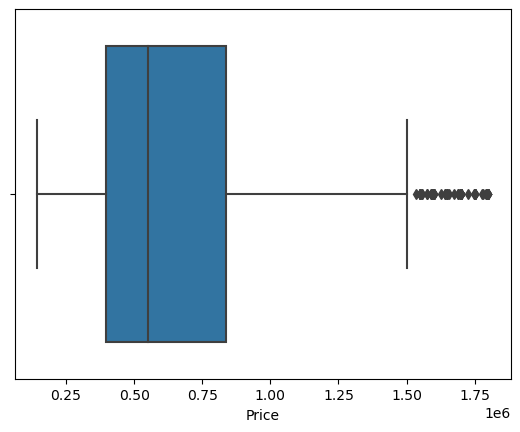

In [22]:
sns.boxplot(df_clean['Price']) #קורלציה בין מחיר לכמות חדרי אמבטיה 
df_clean['Price'].corr(df_clean['Baths_Count'])

Correlation Coefficient: 0.7539128112953037


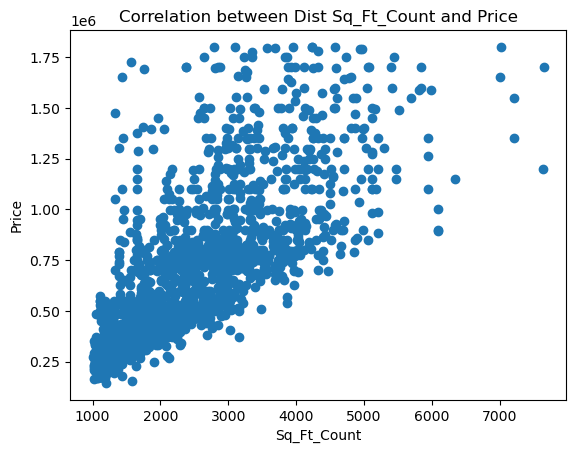

In [23]:
price = df_clean['Price']   #קורלציה בין מחיר למטר מרובע
value = df_clean['Sq_Ft_Count']

plt.scatter(value, price)
plt.xlabel('Sq_Ft_Count')
plt.ylabel('Price')
plt.title('Correlation between Dist Sq_Ft_Count and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
plt.show()

C:\Users\vladi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.39720618844472416

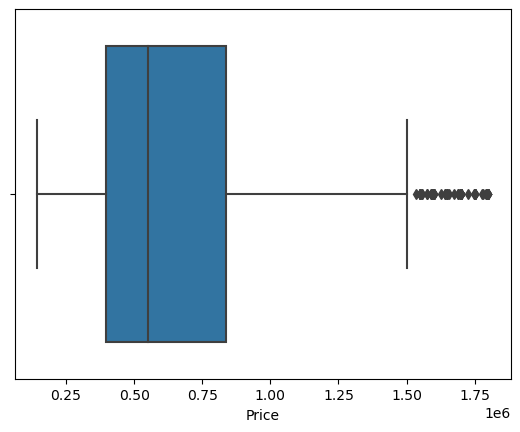

In [24]:
sns.boxplot(df_clean['Price'])  #קורלציה בין מחיר לחדרי שינה
df_clean['Price'].corr(df_clean['Beds_Count'])

<AxesSubplot:xlabel='Price', ylabel='Sq_Ft_Count'>

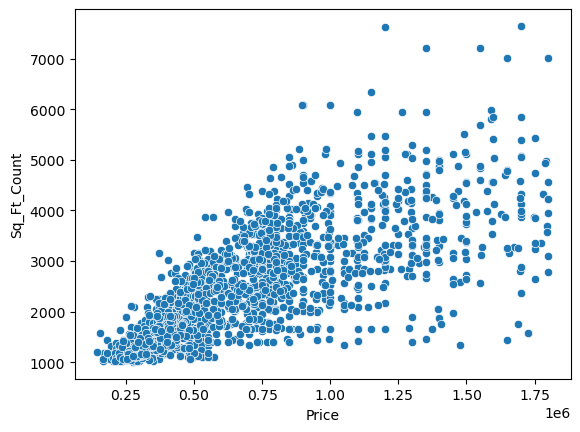

In [25]:
sns.scatterplot(data=df_clean, x='Price', y='Sq_Ft_Count') #תצוגה נוספת של מחיר לעומת מטר מרובע לבית

In [26]:
df_clean.corr()['Price'].sort_values() #כל הקורלציות יחדיו

Year Built Details          0.024616
Attached Garage             0.066203
Association Fee             0.123737
Patio And Porch Features    0.171871
Property Sub Type           0.312758
Beds_Count                  0.397206
Possible Bedrooms           0.496834
Baths_Count                 0.647358
Sq_Ft_Count                 0.753913
Price                       1.000000
Sewer                            NaN
Name: Price, dtype: float64

In [27]:
X = df_clean[["Beds_Count","Baths_Count", "Sq_Ft_Count","Property Sub Type","Possible Bedrooms","Year Built Details","Attached Garage","Sewer","Association Fee","Patio And Porch Features"]]

y = df_clean['Price']

#  בחירת המאפיינים הטובים ביותר
selector = SelectKBest(score_func=f_regression, k=5)#בחירת K=5 המאפיינים הטובים ביותק
X_new = selector.fit_transform(X, y)


selected_features = selector.get_support(indices=True) #המאפיינים שנבחרו על ידי השיטה
selected_columns = X.columns[selected_features]


print(selected_columns)

Index(['Beds_Count', 'Baths_Count', 'Sq_Ft_Count', 'Property Sub Type',
       'Possible Bedrooms'],
      dtype='object')


C:\Users\vladi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\vladi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [28]:
df_machine_learning = df_clean.sample(frac=0.8, random_state=42)#חילוק הדאטה ל80% ו20% על מנת שנוכל לבדוק בהמשך על דאטה שהלמידת מכונה לא ראה
df_test1 = df_clean.drop(df_machine_learning.index)#20% דאטה

coloums11 = ["Year Built Details","Attached Garage","Sewer","Association Fee","Patio And Porch Features"]
df_machine_learning1 = df_machine_learning.drop(columns=coloums11) #מחיקת העמודות שהמליץ לנו הפי'צר סלקשיון

In [29]:
df_machine_learning1

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Property Sub Type,Possible Bedrooms
1038,825000,4,3,2787,2,5
1054,1300000,4,4,3109,2,6
2436,401000,3,3,1674,2,3
1897,1750000,7,5,5440,2,10
1731,1045000,4,4,3331,2,5
...,...,...,...,...,...,...
1364,700000,3,3,2803,2,4
2416,350000,3,2,1315,2,3
2263,515000,4,3,2516,2,5
1286,749000,3,5,2862,2,3


In [30]:
df_test1

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
1,389000,3,2,1365,1,2,1,1,3,0,0
9,474000,2,2,1671,1,1,1,1,3,0,1
14,225000,2,2,1029,1,1,0,1,2,160,1
18,1779000,4,5,4326,1,2,1,1,6,0,1
24,289000,3,2,1454,1,1,1,1,3,160,1
...,...,...,...,...,...,...,...,...,...,...,...
2758,470000,4,2,2006,1,2,0,1,4,0,1
2761,398000,2,2,1333,1,1,1,1,2,0,1
2774,415000,2,2,1348,1,2,1,1,3,0,0
2783,365000,4,3,1916,1,2,1,1,4,55,0


In [31]:
df_test1 = df_test1.reset_index(drop=True) #פונקציה שמסדרת את האינדסקים

In [32]:
df_test1

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,389000,3,2,1365,1,2,1,1,3,0,0
1,474000,2,2,1671,1,1,1,1,3,0,1
2,225000,2,2,1029,1,1,0,1,2,160,1
3,1779000,4,5,4326,1,2,1,1,6,0,1
4,289000,3,2,1454,1,1,1,1,3,160,1
...,...,...,...,...,...,...,...,...,...,...,...
389,470000,4,2,2006,1,2,0,1,4,0,1
390,398000,2,2,1333,1,1,1,1,2,0,1
391,415000,2,2,1348,1,2,1,1,3,0,0
392,365000,4,3,1916,1,2,1,1,4,55,0


In [33]:
coloums10 = ["Price","Year Built Details","Attached Garage","Sewer","Association Fee","Patio And Porch Features"]
df_test = df_test1.drop(columns=coloums10)#מחיקה של העמודות שציינו מקודם גם מהטסט על מנת שיהיה זהה ללמידה
df_test

,Beds_Count,Baths_Count,Sq_Ft_Count,Property Sub Type,Possible Bedrooms
0,3,2,1365,2,3
1,2,2,1671,1,3
2,2,2,1029,1,2
3,4,5,4326,2,6
4,3,2,1454,1,3
...,...,...,...,...,...
389,4,2,2006,2,4
390,2,2,1333,1,2
391,2,2,1348,2,3
392,4,3,1916,2,4


In [34]:
X = df_machine_learning1[["Beds_Count","Baths_Count", "Sq_Ft_Count","Property Sub Type","Possible Bedrooms"]]
y = df_machine_learning1["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)#למידת מכונה
score = model.score(X_test, y_test)  #הפעלה של המודל
print("R^2 score:", score) #הציון שקיבלנו ממד R^2

predictions = model.predict(df_test)
df_test2 = predictions.astype(int) #העברה של התוצאות שקיבלנו לאינט
df_test2



R^2 score: 0.6458348870698418


array([ 370195,  468671,  285958, 1299160,  274804,  669910,  558767,
        523719,  411870,  383117,  429467,  466694,  276061,  416324,
        482817,  619657, 1065043,  507814,  348290,  406206, 1369955,
        329595,  510201,  342106,  524492,  839407, 1054337,  726862,
        285970,  826268,  368907,  349543,  513669,  468196,  330473,
        570621, 1095569,  455826,  283639,  583864,  941977,  619658,
        461165,  321779,  566828,  329252,  352703,  658055,  607657,
        433333,  587955,  495770,  358083,  621272,  428726,  627343,
       1024369,  436240,  368166,  403146,  383713,  788123, 1128297,
        548717,  809070,  329405,  467024,  686146,  572940,  647417,
        859580,  648895,  788197,  411613,  742330,  391585,  483327,
        437271,  788639,  404728,  501557, 1049440,  484431,  752705,
        600189,  191823,  441584,  775311,  208316,  299101,  359593,
        825636,  406753,  479204,  615277,  536194,  595434,  791848,
        605926,  329

In [35]:
df_test1 = df_test1.copy()   #פונקציה שמוסיפה לדאטה לשם הצגה את החיזוי וההפרש מהמחיר המקורי
df_test1.loc[:, 'Prediction of Price'] = df_test2
df_test1.loc[:, 'Difference'] = df_test1['Price'] - df_test1['Prediction of Price']

In [36]:
df_test1

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features,Prediction of Price,Difference
0,389000,3,2,1365,1,2,1,1,3,0,0,370195,18805
1,474000,2,2,1671,1,1,1,1,3,0,1,468671,5329
2,225000,2,2,1029,1,1,0,1,2,160,1,285958,-60958
3,1779000,4,5,4326,1,2,1,1,6,0,1,1299160,479840
4,289000,3,2,1454,1,1,1,1,3,160,1,274804,14196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,470000,4,2,2006,1,2,0,1,4,0,1,414705,55295
390,398000,2,2,1333,1,1,1,1,2,0,1,364300,33700
391,415000,2,2,1348,1,2,1,1,3,0,0,503759,-88759
392,365000,4,3,1916,1,2,1,1,4,55,0,475528,-110528


In [37]:
for index, row in df_test1.iterrows(): #הצגה נוספת על מנת שיהיה קל יותר לראות ערכים שהם מוסתרים בדאטה
    diff = df_test2[index] - row['Price'] 
    print(f"The Original Price {row['Price']} The R^2 Price {df_test2[index]} Difference at index {index}: {diff}")

The Original Price 389000 The R^2 Price 370195 Difference at index 0: -18805
The Original Price 474000 The R^2 Price 468671 Difference at index 1: -5329
The Original Price 225000 The R^2 Price 285958 Difference at index 2: 60958
The Original Price 1779000 The R^2 Price 1299160 Difference at index 3: -479840
The Original Price 289000 The R^2 Price 274804 Difference at index 4: -14196
The Original Price 595000 The R^2 Price 669910 Difference at index 5: 74910
The Original Price 395000 The R^2 Price 558767 Difference at index 6: 163767
The Original Price 445000 The R^2 Price 523719 Difference at index 7: 78719
The Original Price 474900 The R^2 Price 411870 Difference at index 8: -63030
The Original Price 170000 The R^2 Price 383117 Difference at index 9: 213117
The Original Price 475000 The R^2 Price 429467 Difference at index 10: -45533
The Original Price 453900 The R^2 Price 466694 Difference at index 11: 12794
The Original Price 339000 The R^2 Price 276061 Difference at index 12: -6293

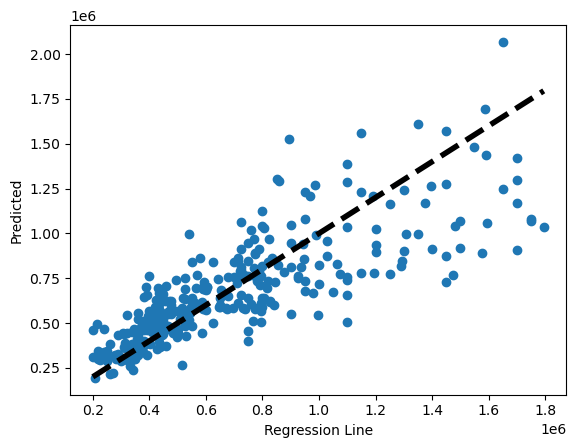

In [38]:
y_pred = model.predict(X_test) #ההתפזרות שקיבלנו בלמידת מכונה

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

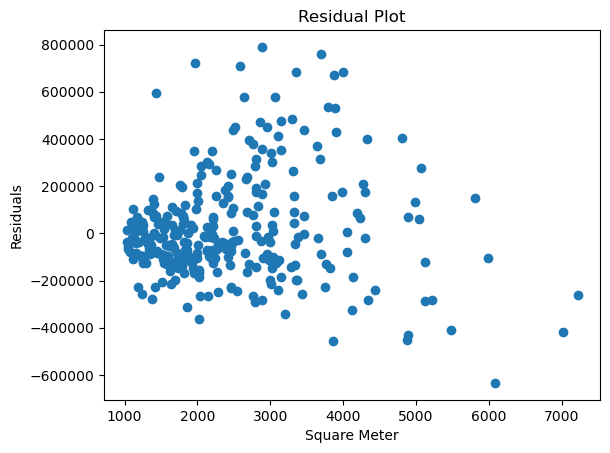

In [39]:
y_pred = model.predict(X_test) #שיטה נוספת ככל שיותר מפוזרים יותר טוב
residuals = y_test - y_pred
plt.scatter(X_test["Sq_Ft_Count"], residuals)
plt.title("Residual Plot")
plt.xlabel("Square Meter")
plt.ylabel("Residuals")
plt.show()

In [40]:
df_machine_learning2 = df_clean['Price'].quantile(0.68) #מחיקת 32% מהדאטה (הערכים הגבוהים)
df_machine_learning2

765000.0

In [41]:
df_train5 = df_clean[df_clean['Price'] <= df_machine_learning2] #חילוק מחדש של הדאטה ל80% ו20%
df_train4 = df_train5.sample(frac=0.8, random_state=42)#חילוק הדאטה ל80% ו20% על מנת שנוכל לבדוק בהמשך על דאטה שהלמידת מכונה לא ראה 
df_test4 = df_train5.drop(df_train4.index)

In [42]:
df_test4 = df_test4.reset_index(drop=True)  #סידור האינדקסים בשני הדאטות שחולקו
df_train4 = df_train4.reset_index(drop=True)
df_train4

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,538000,5,4,2475,3,2,1,1,6,42,1
1,455000,3,2,1725,1,2,1,1,3,29,1
2,499000,4,3,2752,1,2,1,1,4,60,1
3,425000,3,3,1723,1,2,1,1,3,56,1
4,515000,4,4,2627,1,2,1,1,5,24,0
...,...,...,...,...,...,...,...,...,...,...,...
1067,320086,3,3,1208,2,1,1,1,3,129,0
1068,405000,3,3,3019,1,1,1,1,5,195,0
1069,350000,3,3,1499,1,1,1,1,4,150,1
1070,510000,4,4,3484,1,2,1,1,4,0,1


In [43]:
df_test4

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,389000,3,2,1365,1,2,1,1,3,0,0
1,349420,3,2,1058,1,2,0,1,3,0,0
2,452900,4,3,2220,1,2,1,1,4,0,0
3,649900,4,3,3027,1,2,1,1,4,54,1
4,595000,3,3,2135,1,2,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
263,412000,4,3,1916,1,2,1,1,4,85,1
264,410000,3,2,1316,1,2,1,1,3,0,1
265,376000,3,2,1250,1,2,1,1,3,0,0
266,565000,4,3,2703,1,2,1,1,5,0,0


In [44]:
X = df_train4.drop(['Price'], axis = 1) #לעומת הקודם פה נשתמש בכל העמודות ולא הורדנו כלום בדרך
y = df_train4['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)  #למידת מכונה
predict = model.predict(X_test) #הפעלה של המודל
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
r2

0.7090185231313645

In [45]:
scores = cross_val_score(model,X,y) #התוצאות של הקרוס ואלידישין
print("Cross Validation Values: {}".format(scores) )

Cross Validation Values: [0.62815772 0.65624    0.63297306 0.7260657  0.66202062]


In [46]:
df_test5 = df_test4.drop(columns = "Price") #מחיקת העמודה של מחיר מהדאטה שנבדוק
df_test4

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features
0,389000,3,2,1365,1,2,1,1,3,0,0
1,349420,3,2,1058,1,2,0,1,3,0,0
2,452900,4,3,2220,1,2,1,1,4,0,0
3,649900,4,3,3027,1,2,1,1,4,54,1
4,595000,3,3,2135,1,2,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
263,412000,4,3,1916,1,2,1,1,4,85,1
264,410000,3,2,1316,1,2,1,1,3,0,1
265,376000,3,2,1250,1,2,1,1,3,0,0
266,565000,4,3,2703,1,2,1,1,5,0,0


In [47]:
df_test3 = model.predict(df_test5).astype(int) #הדפסה והפיכה לאינט של התוצאות שחזה

In [55]:
df_test4 = df_test4.copy()    #פונקציה שמוסיפה לדאטה לשם הצגה את החיזוי וההפרש מהמחיר המקורי
df_test4.loc[:, 'Prediction of Price'] = df_test3
df_test4.loc[:, 'Difference'] = df_test4['Price'] - df_test4['Prediction of Price']

In [56]:
df_test4

,Price,Beds_Count,Baths_Count,Sq_Ft_Count,Year Built Details,Property Sub Type,Attached Garage,Sewer,Possible Bedrooms,Association Fee,Patio And Porch Features,Prediction of Price,Difference
0,389000,3,2,1365,1,2,1,1,3,0,0,349793,39207
1,349420,3,2,1058,1,2,0,1,3,0,0,272847,76573
2,452900,4,3,2220,1,2,1,1,4,0,0,478113,-25213
3,649900,4,3,3027,1,2,1,1,4,54,1,660447,-10547
4,595000,3,3,2135,1,2,0,1,4,0,1,502111,92889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,412000,4,3,1916,1,2,1,1,4,85,1,466393,-54393
264,410000,3,2,1316,1,2,1,1,3,0,1,375866,34134
265,376000,3,2,1250,1,2,1,1,3,0,0,329428,46572
266,565000,4,3,2703,1,2,1,1,5,0,0,560460,4540


In [50]:
for index, row in df_test4.iterrows(): #ההבדלים בין מה שחזה למציאות
    diff = df_test3[index] - row['Price'] 
    print(f"The Original Price {row['Price']} The Cross Validation Price {df_test3[index]} Difference at index {index}: {diff}")

The Original Price 389000.0 The Cross Validation Price 349793 Difference at index 0: -39207.0
The Original Price 349420.0 The Cross Validation Price 272847 Difference at index 1: -76573.0
The Original Price 452900.0 The Cross Validation Price 478113 Difference at index 2: 25213.0
The Original Price 649900.0 The Cross Validation Price 660447 Difference at index 3: 10547.0
The Original Price 595000.0 The Cross Validation Price 502111 Difference at index 4: -92889.0
The Original Price 395000.0 The Cross Validation Price 516228 Difference at index 5: 121228.0
The Original Price 299995.0 The Cross Validation Price 277289 Difference at index 6: -22706.0
The Original Price 449900.0 The Cross Validation Price 411673 Difference at index 7: -38227.0
The Original Price 455000.0 The Cross Validation Price 516012 Difference at index 8: 61012.0
The Original Price 460000.0 The Cross Validation Price 464961 Difference at index 9: 4961.0
The Original Price 385000.0 The Cross Validation Price 431759 Dif

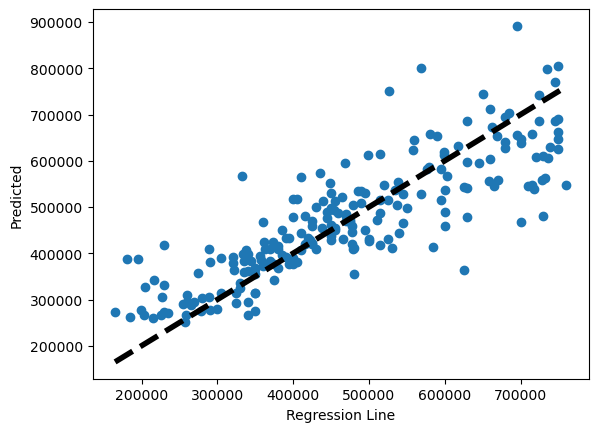

In [51]:
y_pred = model.predict(X_test) #תצוגה של הפיזור בתוצאות המקוריות לחיזוי

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

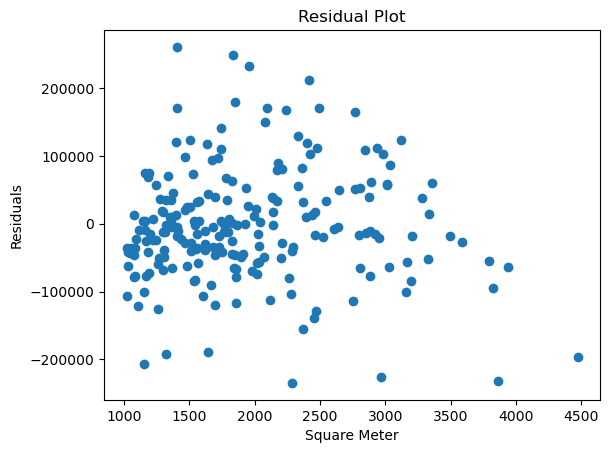

In [52]:
y_pred = model.predict(X_test) #ככל שיותר מפוזר יותר טוב
residuals = y_test - y_pred
plt.scatter(X_test["Sq_Ft_Count"], residuals)
plt.title("Residual Plot")
plt.xlabel("Square Meter")
plt.ylabel("Residuals")
plt.show()